# QTM 385 Pandas Project 
Huilan You
10/30/2018

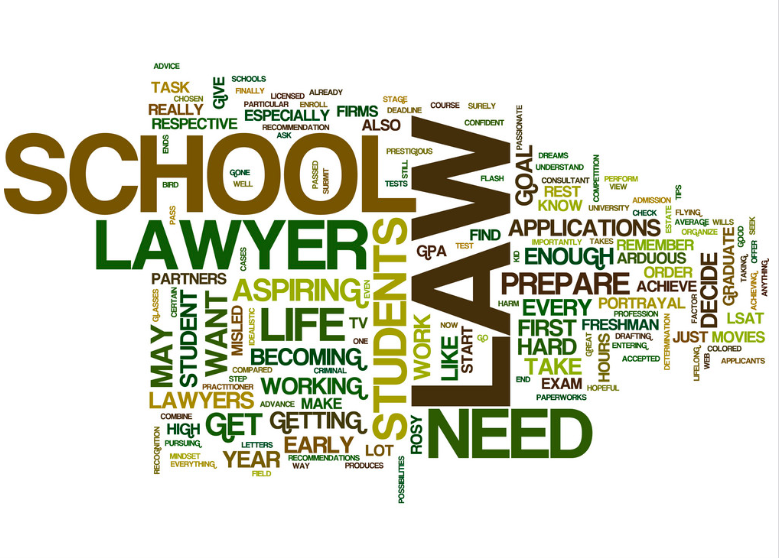

In [18]:
from IPython.display import Image
Image(filename="law.png",width=400,height=400)

# What factors affect the enrollment rate of law schools in the United States?
# What factors affect the employment rate at graduation and the first-time bar pass rate?
# Is there any difference between public law schools and private law schools?


## Why I chose this question to investigate:

The questions that I would like to analyze for this project are regarding to the legal education in the United States. I want to analyze what factors affect the law schools' admission and what factors affect the employment rate at graduation and the first-time bar pass rate, and the difference between the public and the private law schools. 

The reason I pick this topic is because my best friend, Rumeng is taking a gap year to prepare her law school application and she wants to become a lawyer after attending law school.Recently, I also read an article about "Trump Bump" and the increase of the law school applicants. Since people hope to make a difference as lawyers as the anger arose on Trump’s travel ban and other policies, Law School Admissions Test (LSAT) takers increased by 21.4% from 2016 to 2017 and the total number of applicants increased by 10.6% from 2017 to 2018[(Chicago Tribune, 2017)](https://www.chicagotribune.com/business/ct-biz-lsat-registration-up-trump-bump-20171116-story.html). Because of my friend and the increasing amount of the law school applicants, I hope to utilize my quantitative skills I learned from QTM385 to help them understand what variables influence their chance of getting into a law school and what factors impact their chance to be employed and pass the bar test.

## How my analysis provides different insights:

For enrollment rate, researchers have been analyzing the factors affect enrollment rate at student level for years. However, my research focus on the emprirical analysis on the school level. My observation is 193 law schools instead of specific students. The reason I examine the factors of enrollment rate at school level is that I want to examine the difference between the public and the private law schools. Moreover, talking to Rumeng, I realized that when people apply for the law school, they care more about their target schools insteand of the total applicantion pool. Thus, I believe my analysis can provide students with different and interesting insights from the previous literatures.   

Many publications critized that people relied too much on the rankings when making enrollment decisions[(Slon, 2018)](https://finance.yahoo.com/news/poll-don-apos-t-put-062905017.html). Although the rankings are also very helpful in providing consumer information to potential students and aligning prospects with institutions, for the second research question, my analysis ignored the biased ranking systems and examined the measurable dependent variable - employment rate at graduation and the first-time bar pass rate. These factors are more directly correlated to law school students' post-graduate goal: people care about their career and passing the bar is indispensible to become a lawyer.

In order to answer these reseach questions, I conduct a series of experiments and analysis. As I am interested in comparing the difference between the public schools and private school, I conduct the hypothese tests for the enrollment rate,the employment rate and the bar pass rate on public school and private school. Furthermore, I also use scatter plots to analyze the relationship between different variables such provide readers the insights of different factors.

### Import neccessary packages

In [19]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.show()
from scipy import stats
from pandas.tools import plotting
from datascience import *
#Why? Questions? Ranking?

## Data Collection:

In order to analyze the questions I mentioned above, I collected data from American Bar Association(ABA) and combined several datasets which include information about enrollment, school infomartion, student results. I chose to collect data from American Bar Association because it has the most objective and exhaustive data. For ABA accredited schools, it is required to disclose a variety information for current and perspective students. [The ABA Standard 509 Closure](http://www.abarequireddisclosures.org/Disclosure509.aspx) provides such information (You can click the link above  to check my data accuracy).
On the contrary, different rankings have different valuation methods which can be biased. For instance,[The Princeton Review](https://www.princetonreview.com/law-school-rankings?rankings=best-career-prospects) ranks New York University - School of law No.1 in Best Career Prospects but [U.S.News](https://www.usnews.com/best-graduate-schools/search?program=top-law-schools&specialty=law&name=New) ranks New York University - School of law No.6. Therefore, to ensure data accuracy of my analysis, I chose to collect data from ABA insteads of different other websites.

After I collected data from ABA in excel, I combined the different datasets, droped some unnecessary variables such as mnay categorical variables regions for my analysis and created important variables for my new dataframe. First, I created a variable called enroll_rate = (the number of the full-time applications)/(the number of offers) which is a dependent variable to quantify the competitiveness of the school. Second, as the dataset provides two variables indicating the school type, I also created a variable called type_binary which mean 0 is private and 1 is public. The last variable I created is pct_employed. It is simply equal to 1-pct_unemp. I created these variables to help me analyze the combined dataset.
                           

## Data Frame:
I import the original dataset from American Bar Association website and explore the original dataset. Since, the original dataset has so many unnessary variables and is not sufficient to answer my three research questions. I created a new dataframe called 'legal' and variables based on the original data and conducted my analysis on my new dataframe.

In [20]:
# Read the excel file, manually create the header of the variables and create the data frame legal  
original = pd.read_excel("https://github.com/angelinayhl/Python385/blob/master/legal_original.xls?raw=TRUE")
                           

### Data Exploration of the original dataset. 
The original dataset is collected by ABA. Before I jump into my analysis, it is important to understand the data and pick important variables that related to my project. From my exploration, we can see that there are 386 law schools as our observations, however, the data collected from both 2013 and 2014. Moreover, there are too many variables in the original dataset, it is important to decide which variables to use in my analysis.

In [21]:
original.shape[0]

386

Let's get an overview of the first 10 observations for our data. From the overview, you can see that the original datsset is overwhelming as we have so many variables. In this case, I would only leave the variables that are related to my three research questions.

In [22]:
original.head(10)

,schoolid,schoolname,calendaryear,numftapps,numptapps,numftoffers,numptoffers,numftmatriculants,numptmatriculants,ftuggpa75,...,graduates,nobar,noinfo,ftpriorclass,takers,schoolpasspct,passpct,passpctdiff,pass_ratio,include_ipeds
0,100300,Faulkner University,2013,494,0,377,0,104,0,3.42,...,77,13,3,10,71,0.7042,0.7804,-0.0762,0.902358,1
1,100300,Faulkner University,2014,459,0,353,0,113,0,3.34,...,74,8,7,14,73,0.5068,0.7800,-0.2732,0.649744,1
2,103600,Samford University,2013,713,0,567,0,173,0,3.50,...,151,29,0,21,143,0.6364,0.7753,-0.1389,0.820844,1
3,103600,Samford University,2014,688,0,522,0,146,0,3.52,...,144,26,7,21,132,0.7045,0.7817,-0.0772,0.901241,1
4,105100,University of Alabama,2013,1849,0,454,0,145,0,3.94,...,144,17,2,13,138,0.9058,0.7641,0.1417,1.185447,1
5,105100,University of Alabama,2014,1896,0,521,0,134,0,3.94,...,132,16,2,14,128,0.9375,0.7788,0.1587,1.203775,1
6,108100,Arizona State University,2013,1595,0,624,0,128,0,3.71,...,173,20,4,32,181,0.7735,0.6323,0.1412,1.223312,1
7,108100,Arizona State University,2014,1410,0,622,0,143,0,3.78,...,215,41,0,13,187,0.7540,0.6494,0.1046,1.161072,1
8,108300,University of Arizona,2013,1243,0,501,0,105,0,3.72,...,108,13,0,22,117,0.6838,0.6578,0.0260,1.039526,1
9,108300,University of Arizona,2014,1234,0,482,0,104,0,3.72,...,127,11,1,6,121,0.7272,0.6706,0.0566,1.084402,1


As we have two calendar years, which means we collect the information twice for the same school, we also need to be cautious that the applicants applies for law schools would be different in 2013 and 2014. For instance, the total number of applicants is different. We have 355042 applicants in 2013 and 328920 applicants in 2014. Since we have different applicants pools for 2013 and 2014, we need to condition on year and look at the same pool of applicants.

In [23]:
original.groupby('calendaryear').numftapps.sum()

calendaryear
2013    355042
2014    328920
Name: numftapps, dtype: int64

As we collect the data at school level, we also take a look of the first observation.
Overview of the first data: Faulkner University: 

In [24]:
original.iloc[0]

schoolid                          100300
schoolname           Faulkner University
calendaryear                        2013
numftapps                            494
numptapps                              0
numftoffers                          377
numptoffers                            0
numftmatriculants                    104
numptmatriculants                      0
ftuggpa75                           3.42
ftuggpa50                           3.14
ftuggpa25                           2.77
ftuggpaexcl                            0
ptuggpaexcl                            0
ftlsat75                             151
ftlsat50                             146
ftlsat25                             142
academicyear                        2013
schoolstate                           AL
schooltype                           PRI
totaljddeg                            75
cohort                              2016
bar_ftlt                              43
bar_emp                               46
jda_ftlt        

### Recreate a new dataframe
For my analysis, I recreated the dataframe so that it's cleaner and easier to answer these three research questions

First, I only include the variables: school name, entering year, number of applicants for each law school, number of offers each school sent out, the median undergraduate GPA of the applicants, the median LSAT for the applicants, the type of school, the number of students who enroll in each law school, the unemployment rate, the first-time bar pass rate.

Then, as we are interested in the employment rate, I create a variable called pct_unemp which is equal 1-unemployment rate. I also create a variable to indicate enrollment rate which is equal to number of students who final enrolled in this law school divides by the total amount of applicants. In order to exclude the influence from different years, we only analyze the applicants from 2014. I also create a binary variable which means 0 is private school and 1 is public school

The following is an overview of my new dataframe.

In [25]:
legal = original.filter(['schoolname','calendaryear','numftapps','numftoffers','ftuggpa50','ftlsat50','schooltype','ftnumstudents','control','public','private','forprofit','pct_unemp','passpct','pass_ratio'], axis=1)
legal['pct_emp'] = 1 - legal['pct_unemp']
legal['type_binary'] = [int(s == 'PUB') for s in legal['schooltype']]
# 
legal['enroll_rate'] = legal['ftnumstudents']/legal['numftapps']
year_2013 = [i for i, year in enumerate(legal['calendaryear']) if year == 2013]
legal = legal.drop(year_2013, axis=0)
legal.head(10)

,schoolname,calendaryear,numftapps,numftoffers,ftuggpa50,ftlsat50,schooltype,ftnumstudents,control,public,private,forprofit,pct_unemp,passpct,pass_ratio,pct_emp,type_binary,enroll_rate
1,Faulkner University,2014,459,353,2.98,145,PRI,273,Private Non-Profit,0.0,1.0,0.0,0.103896,0.7800,0.649744,0.896104,0,0.594771
3,Samford University,2014,688,522,3.20,151,PRI,401,Private Non-Profit,0.0,1.0,0.0,0.072464,0.7817,0.901241,0.927536,0,0.582849
5,University of Alabama,2014,1896,521,3.77,163,PUB,420,Public,1.0,0.0,0.0,0.038168,0.7788,1.203775,0.961832,1,0.221519
7,Arizona State University,2014,1410,622,3.61,162,PUB,576,Public,1.0,0.0,0.0,0.070707,0.6494,1.161072,0.929293,1,0.408511
9,University of Arizona,2014,1234,482,3.57,161,PUB,379,Public,1.0,0.0,0.0,0.070312,0.6706,1.084402,0.929688,1,0.307131
11,University of Arkansas-Little Rock,2014,417,253,3.28,151,PUB,306,Public,1.0,0.0,0.0,0.133333,0.7722,0.990287,0.866667,1,0.733813
13,University of Arkansas-Fayetteville,2014,624,377,3.43,154,PUB,361,Public,1.0,0.0,0.0,0.112069,0.7817,1.078547,0.887931,1,0.578526
15,Chapman University,2014,1405,755,3.41,156,PRI,444,Private Non-Profit,0.0,1.0,0.0,0.202703,0.6634,0.962918,0.797297,0,0.316014
17,Golden Gate University,2014,1183,781,2.98,150,PRI,301,Private Non-Profit,0.0,1.0,0.0,0.229885,0.6641,0.735733,0.770115,0,0.254438
19,University of La Verne,2014,482,230,2.87,148,PRI,106,Private Non-Profit,0.0,1.0,0.0,0.394737,0.6702,0.628320,0.605263,0,0.219917


In [26]:
legal.shape[0]

194

There are 194 ABA Accredited Law Schools for the class of 2017(entering in 2014) in my analysis.

## Analysis and Experiments

### Which type is the majority of law schools?
There are three types of law schools in the United States: private for-profit, private non-profit and public. We are interested in the distribution of these theree types of school because the school type is also one factor when applicants consider which schools they should go to. 

From the analysis, we see that there are 5 private for-profit law schools, 108 private non-profit law schools and 79 public law schools. From the pie chart, we can see that the private non-profit law schools is the majority of the law school in the United States. As applicants have preference over different types of law schools, such law schools distribution can also influence the students'options. For example, my friend, Runmeng told me she only wants to apply to the flagship public law school. Considering the number of different types of law school, I would also suggest Rumeng to expand her choice and also consider some good private non-profit schools.

In [27]:
legal.groupby('control').schooltype.count()

control
Private For-Profit      5
Private Non-Profit    109
Public                 79
Name: schooltype, dtype: int64

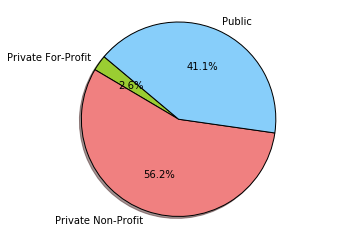

### What's the relationship between different variables?
I am intereste in analyzing the relationship between different variables because it can help us understand the legal education context. I am especially interested in analyzing LSAT and UGPA as independent variables because many researchers indicate that they are the most significant two factors affecting the applicants' chance to get into a law school [(Ryan,2018)](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2623728). In order to help my friend and other applicants to understand the importance of LSAT and UGPA, I will analyze how these two variables affect the enrollment rate, employment rate and bar pass ratio. Then, I also analyze the relationship between the bar pass ratio and the empolyment rate. Because “only California, Virginia, Vermont and Washington allow aspiring lawyers to take bar exam without going to law school" [(Crockett, Priceonomics)]( https://priceonomics.com/how-to-be-a-lawyer-without-going-to-law-school/), I want to see how the bar pass ratio influence the employment rate.

My questions for this part of analyse are:
1. What is the relationship between LSAT and enrollment rate, first-time bar pass rate, and employment rate?
2. What is the relationship between Undergraduate GPA and enrollment rate, first-time bar pass rate, and employment rate?
3. How do the enrollment rate, bar pass rate and employment rate correlate with each others?

In order to answer answer, I use scatter plots to see the trends and correlation between two variables.

#### Scatter plot between median LSAT and the enrollment rate.

The graph indicates that the schools with a lower enrollment rate have a pool of higher LSAT applicants, which means the more competitive school you apply to, the higher LSAT the applicants normally have. Therefore, if you want to be admitted to a very competitive school, be prepared and study your LSAT! 

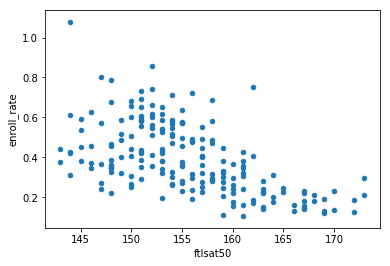

In [29]:
legal.plot.scatter(x='ftlsat50', y='enroll_rate');

#### Scatter plot between median UGPA and the enrollment rate.
Compare to LSAT, the UGPA is more spread out, which make sense. Consider the undergraduate education quality of different schools, the GPA scores is not the standard measurement of a student's performance. Unlike SAT, some schools might tend to have a higher GPA, some school with a better education quality might also have a low GPA. Having a high UGPA still means you have a better chance to get into a competitive law school. However, if you don't have a good GPA, don't be frustrated!

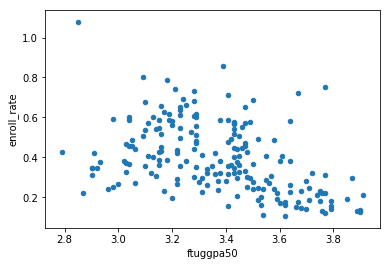

In [30]:
legal.plot.scatter(x='ftuggpa50', y='enroll_rate');

#### Scatter plot between median UGPA and the employment rate.
It seems like if you have a UGPA that higher than 3.3, it has a very weak relationship between the employment rate. Because the employment rate is more related to your performance at law school, your UGPA can be a reference of your capability but it won't be the determining factor for whether you will be employed or not!

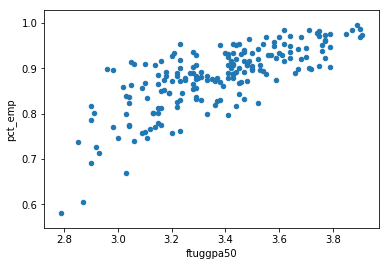

In [31]:
legal.plot.scatter(x='ftuggpa50', y='pct_emp');

#### Scatter plot between median UGPA and the bar pass rate.

Look! The firt-time bar pass rate seems to be unrelated to your UGPA. Because the bar exam is more correlated to your legal education, your UGPA would not influence your chance to pass the bar. Study hard in law school and pass the bar!

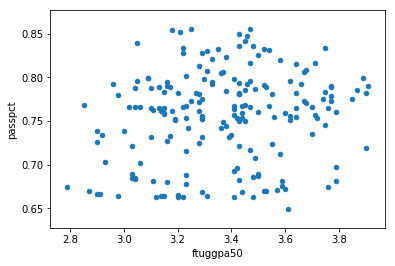

In [32]:
legal.plot.scatter(x='ftuggpa50', y='passpct');

#### Scatter plot between median LSAT and the bar pass rate.
Similarily, the first-time bar pass rate seems to be unrelated to your LSAT. After you enter the law school, you entrance test won't matter that much.

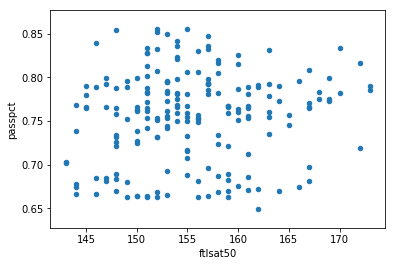

In [33]:
legal.plot.scatter(x='ftlsat50', y='passpct');

#### Relationship between the enrollment rate, first-time bar pass ratio and employment rate

When students apply to law schools, they care about whether they can receive offer from the schools, whether they can pass the bar exam after graduation, and whether they can successfully find a job. Therefore, it is also interesting to look at the relationships between these variabke. From the matix, we see that it is the strong linear correlation between the bar pass rate and the employment rate, which makes sense. As many legal careers required passing the bar exam, it is intuitive that passing the bar can lead high employment rate.

If you want to become a lawyer, study the bar!

Another thing, we need to look at the relationship between the enrollment rate and the bar pass ratio and unemployment rate. The graph indicates that there is a negative relationship between the enrollment rate and the bar pass rate and the relationship between the enrollment rate and the employment rate, which means the more competitive school, you go to, the higher chance you will pass the bar or be employed before graduation. However, the scatter plots also suggest that there are lots of variations. Thus, schools can not determine your future and youself determines more than just only your legal education!

In [1]:

plotting.scatter_matrix(legal['enroll_rate','pass_ratio'])

NameError: name 'plotting' is not defined

### Is there any difference between public law schools and private law schools?
My last question is to find out the difference between the public and the private law schools. I use the hypothese tests to test the average enrollment rate, the average first-time bass pass rate and the average employment rate for private law schools and the public law schools.

#### The hypothese test for the average public law schools' enrollment rate and the average private school's enrollment rate
From the the boxplot, we see that public school(indicates as 1) has a high average enrollment rate, which mean in general, the public school is less competitive. Moreover, the p-value is 0.01<0.05, we reject the H0 that the actual average enrollment rate of privates schools is equal to the average enrollment rate of public schools. Therefore, the enrollment rate between the private schools and the public schools are overall different. 

Thus, the types of school would influence the enrollment rate! Consider the type of school when you worry about your chance to get into this law school!

In [ ]:
boxplot = legal.boxplot(column=['enroll_rate'], by='type_binary')
private_enroll = legal[legal['type_binary'] == 0]['enroll_rate']
public_enroll = legal[legal['type_binary'] == 1]['enroll_rate']
stats.ttest_ind(private_enroll, public_enroll)

#### The hypothese test for the average public law schools' bar pass rate and the average private school's bar pass rate
From the the boxplot, we see that private school(indicates as 0) has a litte higher average bar pass rate, which means in general, the private shool has a better performance in bar exam. However, the p-value is 0.65>0.05, we fail to reject the H0 that the actual average bar pass rate of privates schools is equal to the average bar pass rate of public schools. Therefore, the bar pass rate between the private schools and the public schools are overall the same. 


In [ ]:
boxplot = legal.boxplot(column=['passpct'], by='type_binary')
private_pass = legal[legal['type_binary'] == 0]['passpct']
public_pass = legal[legal['type_binary'] == 1]['passpct']
stats.ttest_ind(private_pass, public_pass)

#### The hypothese test for the average public law schools' employment rate and the average private school's employment rate
From the the boxplot, we see that public school(indicates as 1) has a higher average employment rate, which means in general, graduating from a public school brings your more job opportunities. Moreover, the p-value is 0.002<0.05, we reject the H0 that the actual average employment rate of privates schools is equal to the average employment rate of public schools. Therefore, the employment rate between the private schools and the public schools are overall different. 

Talking to Rumeng, I know that for public schools, there are many flagship state univeristies for public schools, these school have a strong alumni network and strong reputation, whereas for private school, there are some private for-profit law schools decrease the average employment rate for the private schools. Thus,when you think about employment rate, be mindful of the school type!

In [ ]:
boxplot = legal.boxplot(column=['pct_employed'], by='type_binary')
private_employed = legal[legal['type_binary'] == 0]['pct_employed']
public_employed = legal[legal['type_binary'] == 1]['pct_employed']
stats.ttest_ind(private_employed, public_employed)

## Limitation
There are some limitations for my analysis. First, I only analyzed the ABA accredited law schools and the class of 2017. There might be some changes every year that influence the student enrollment rate, the first-time bar pass rate and the employment rate. Furthermore, for the hypothese tests, I divided the law schools to public schools and private law schools. However, within private law schools, there are for-profit and non-profit. As the performance of the private for-profit is different from the private non-profit. It would be more precise if we also have analyzed the difference within the private school. Last but not the least, since we measure the first-time bar pass rate and the employment rate at graduation as dependent variables, the dependent variables might not be a perfect capture of the result metrics of law schools since people can take bar for several times and find a joob after graduation.